In [1]:
import pydicom as dicom
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from functions import *
from stripthem import *

# Processing

In [93]:
path = ('D:\\DWNLDS\\test issl itmo\\test issl\\185 rs\\dicom\\AX T1 3D FSPGR+C - 7 - png')

In [94]:
im = 'IM-0007-0149-0001.dcm.png'

In [95]:
npat = os.path.join(path,im)

In [96]:
img = cv2.imread(os.path.join(path,im))

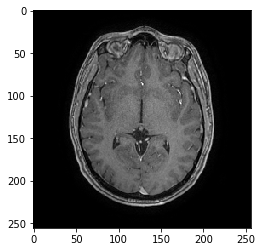

In [97]:
view(img)

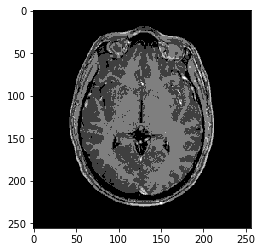

In [98]:
n = 5# Number of levels of quantization

indices = np.arange(0,256)   # List of all colors 

divider = np.linspace(0,255,n+1)[1] # we get a divider

quantiz = np.int0(np.linspace(0,255,n)) # we get quantization colors

color_levels = np.clip(np.int0(indices/divider),0,n-1) # color levels 0,1,2..

palette = quantiz[color_levels] # Creating the palette

im2 = palette[img]  # Applying palette on image

im2 = cv2.convertScaleAbs(im2) # Converting image back to uint8

view(im2)

In [99]:
gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

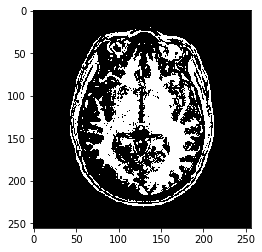

In [100]:
first = gray > 80
view(first)

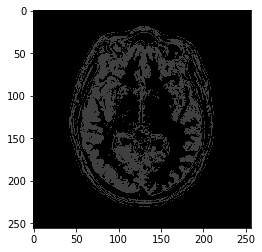

In [101]:
nofat = applymask(im2, ~first)
view(nofat)

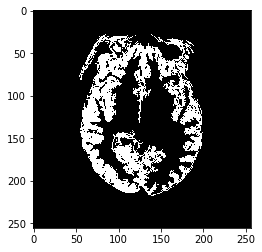

In [102]:
gray = cv2.cvtColor(nofat, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

brain_mask = remgar(thresh)
brain_mask = np.uint8(brain_mask)
view(brain_mask)

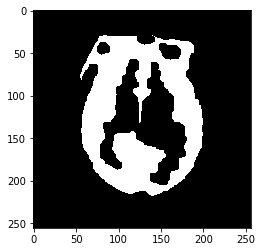

In [103]:

closing = close(brain_mask, 10)
view(closing)

In [104]:
import functions

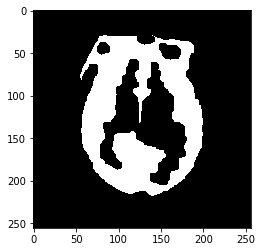

In [105]:
taks = tophat(closing, kernel(5))
view(taks)

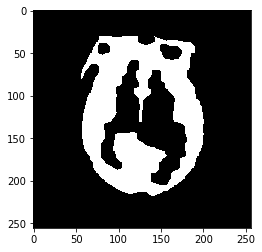

In [106]:
closing = close(taks, 10)
view(closing)

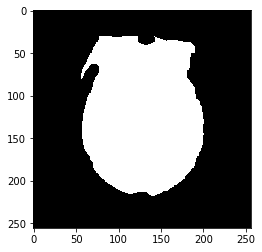

In [107]:
fill = floodfill(np.uint8(closing))
view(fill)

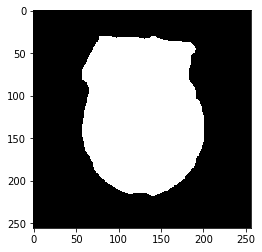

In [108]:
closing3 = functions.close(fill, 30)
view(closing3)

In [109]:
# dilate = cv2.dilate(fill, kernel(20))
# view(dilate)

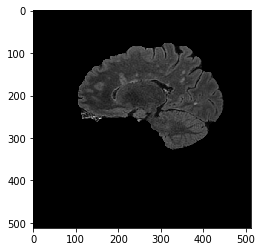

In [82]:
result2 = applymask(img, closing3)
view(result2)

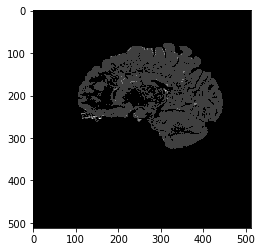

In [83]:
n = 5# Number of levels of quantization

indices = np.arange(0,256)   # List of all colors 

divider = np.linspace(0,255,n+1)[1] # we get a divider

quantiz = np.int0(np.linspace(0,255,n)) # we get quantization colors

color_levels = np.clip(np.int0(indices/divider),0,n-1) # color levels 0,1,2..

palette = quantiz[color_levels] # Creating the palette

im3 = palette[result2]  # Applying palette on image

im3 = cv2.convertScaleAbs(im3) # Converting image back to uint8

view(im3)

In [84]:
gray = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

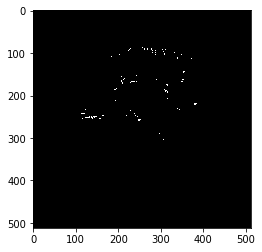

In [85]:
first = gray > 80
view(first)

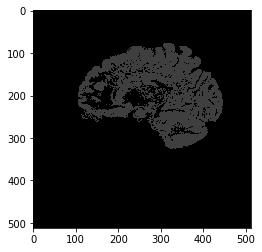

In [86]:
nofat = applymask(im3, ~first)
view(nofat)

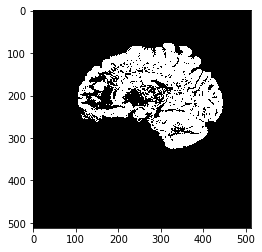

In [87]:
gray = cv2.cvtColor(nofat, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

# brain_mask = remgar(thresh)
# brain_mask = np.uint8(brain_mask)
view(thresh)

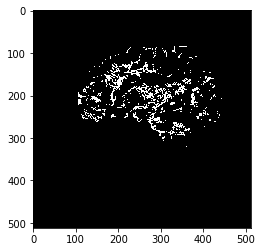

In [88]:
nolines = top_hat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel(8))
view(nolines)

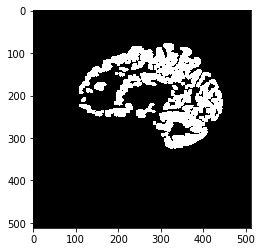

In [89]:
clean = thresh - nolines
view(clean)

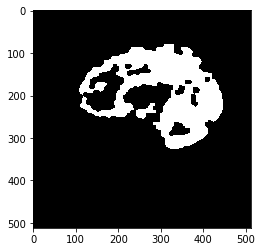

In [90]:
fill2 = close(clean, 10)
view(fill2)

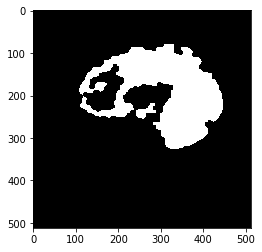

In [91]:
fill3 = floodfill(fill2)
view(fill3)

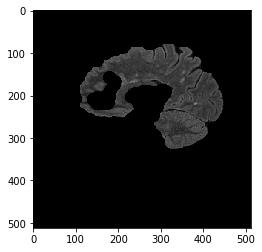

In [92]:
mm = remgar(fill3)
argh = close(mm, 30)
so = applymask(img, argh)
view(so)